# Example Notebook with Edge Detection

The following notebook will walk you through the analysis of a 48-well wellplate containing 24 samples of Candelilla Wax and the remaining Xylitol samples. 

#### Import the necessary packages 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from phasIR import thermal_analysis as ta
from phasIR import image_analysis as ia
from phasIR import data_management as dm
from ipywidgets import interactive

In [3]:
%matplotlib inline

In [4]:
plt.rcParams['figure.max_open_warning'] = False

___
___

## Image Analysis 

To use the automatic Edge Detection module, the frame of an empty plate will be used to determine the palte coordinates to allow for better image analysis. 

1. Import the video from the Raspoberry Pi interface of the PhasIR system.

In [ ]:
# Inputting the video as a stack of arrays
frames = ia.input_file('../data/empty_plates_images/24_conical_empty_plate.png')

2. Crop the image to remove the background and any additional object in the frame

In [40]:
interactive_image, height, width = ia.manual_crop(frames)
size_widget= interactive(interactive_image, width=width, height=height)
size_widget

interactive(children=(IntRangeSlider(value=(0, 160), description='Width:', max=160), IntRangeSlider(value=(0, …

In [41]:
cropped_frames= ia.crop_frames(size_widget, [frames])

4. Identify the plate position based on the centroid of each well

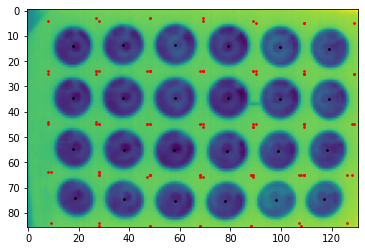

In [44]:
img_24 = cropped_frames[0]
samples_24 = ia.edge_detection(img_24, 24,method='sobel')
sample_loc_24 = ia.sample_locations(samples_24,24, dtype='float')
sorted_loc_24 = ia.sort_samples(sample_loc_24, 6,4)
plate_loc_24 = ia.plate_location(sorted_loc_24, 6,4)
plt.imshow(img_24)
plt.scatter(sorted_loc_24['Column'],sorted_loc_24['Row'], c='k', s=3)
plt.scatter(plate_loc_24['Plate_col'],plate_loc_24['Plate_row'], c='r', s=3)

## Thermal Analysis

Based on the coordinates found in the image analysis section, the temperature profile of each sample and the plate temperature are obtained for each well in the frame. 

* Sample Temperature : Temperature taken as the average value of the pixels forming a  circle centered around the centroid with variable radius _r_

* Plate Temperature : Temperature taken as the average of the four diagonally spaced around each well.

In [45]:
# Inputting the video as a stack of arrays
frames_24 = ia.input_file('../data/20210204_24well_DDA_hotplate_Thu_Feb_4_11-16-19_2021.HDF5') 

In [46]:
interactive_image, height, width = ia.manual_crop(frames_24[-1])
size_widget= interactive(interactive_image, width=width, height=height)
size_widget

interactive(children=(IntRangeSlider(value=(0, 160), description='Width:', max=160), IntRangeSlider(value=(0, …

In [50]:
crop_frames= ia.crop_frames(size_widget, frames_24)

In [51]:
sample_temp_24, plate_temp_24 = ta.pixel_intensity(sorted_loc_24, plate_loc_24, crop_frames, r=2)

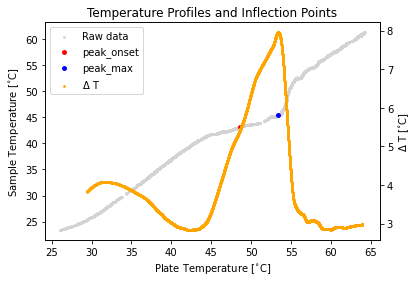

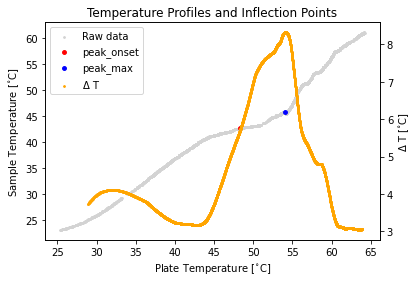

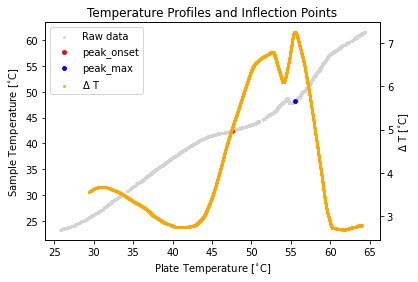

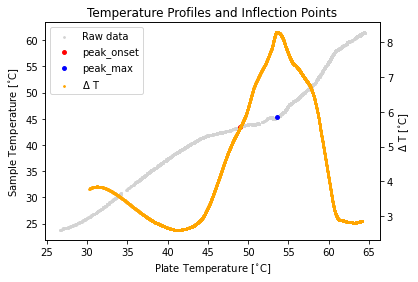

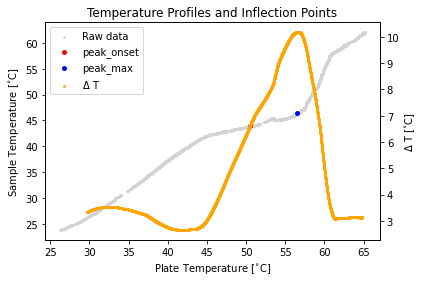

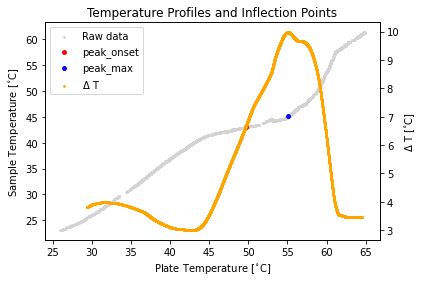

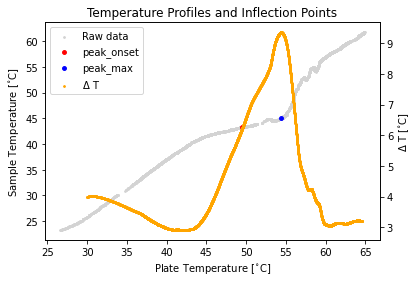

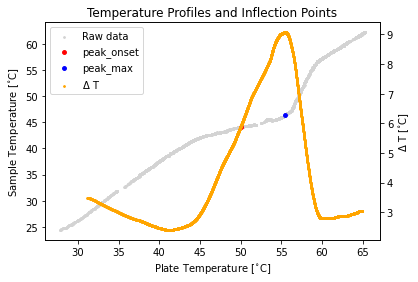

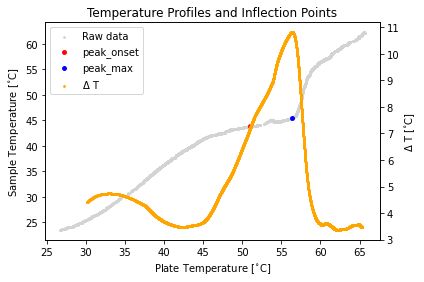

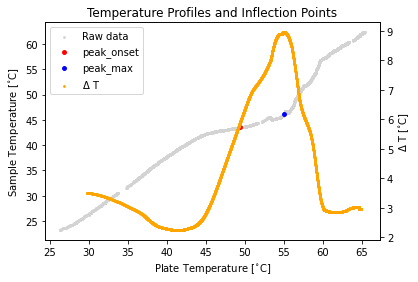

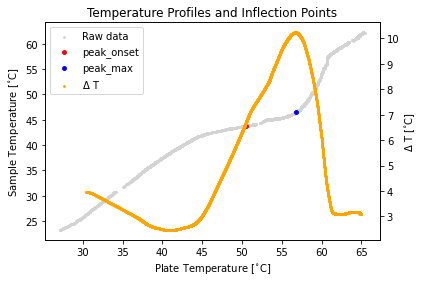

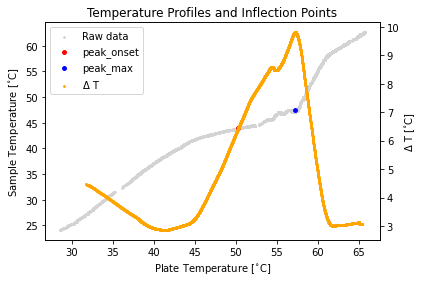

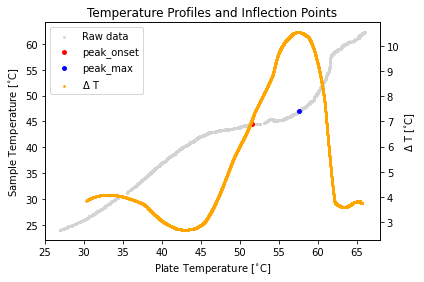

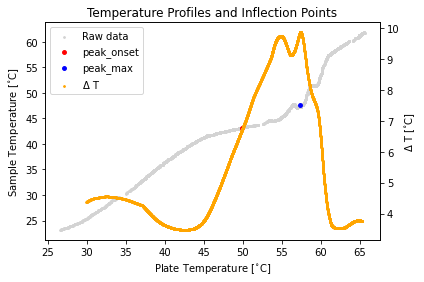

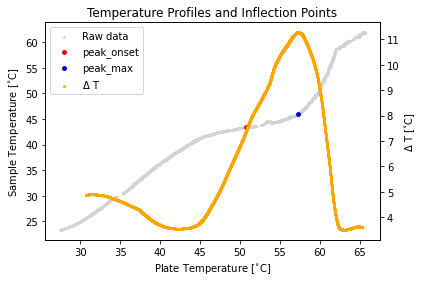

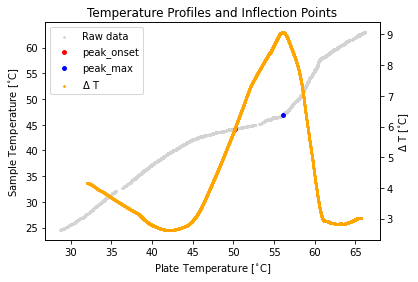

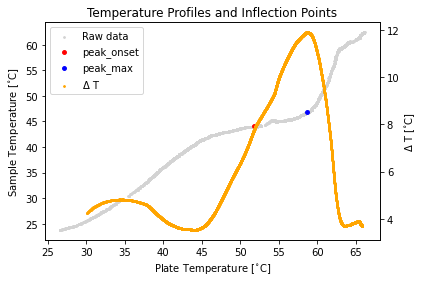

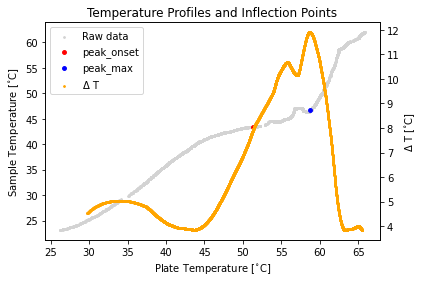

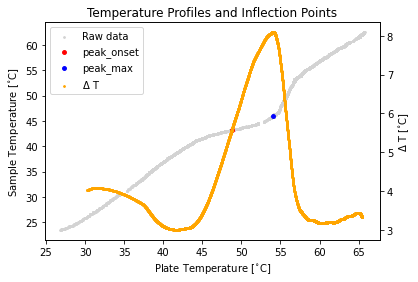

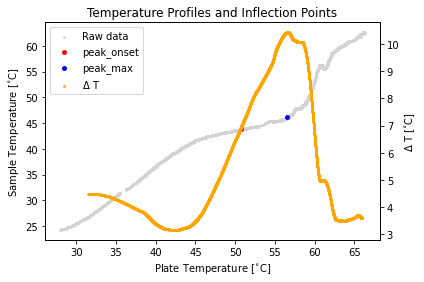

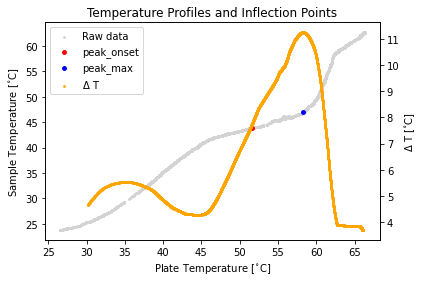

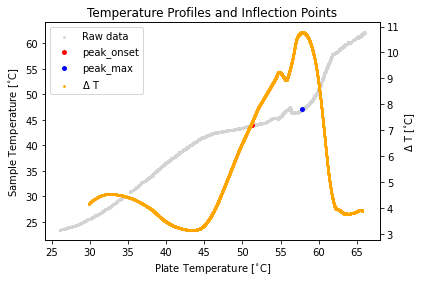

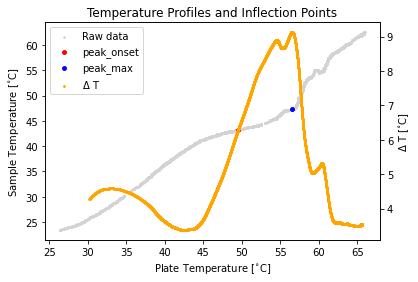

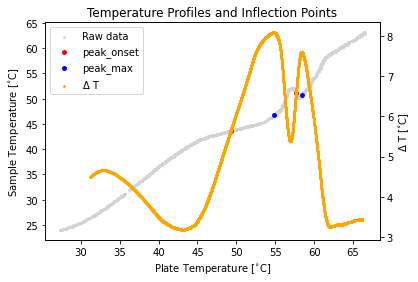

In [53]:
temp_df = ta.phase_transition_temperature(plate_temp_24, sample_temp_24,plot=True)

___
___

In [ ]:
dm.save_results(sample_temp_24, plate_temp_24, './', 'my_test_data', 4,3)